In [1]:
!pip install -q kaggle

In [15]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanusharma23","key":"2b6c829867f1ce0d67df47eb8bb9d1b9"}'}

In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [17]:
!kaggle datasets download -d abdelghaniaaba/wildfire-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset
License(s): other
 97% 1.41G/1.45G [00:15<00:00, 285MB/s]
100% 1.45G/1.45G [00:15<00:00, 99.4MB/s]


In [18]:
!unzip wildfire-prediction-dataset.zip -d wildfire_data

Streaming output truncated to the last 5000 lines.
  inflating: wildfire_data/valid/nowildfire/-73.465183,45.443641.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.465388,45.584881.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.469451,45.480331.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.471252,45.51974.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.472693,45.427766.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.473015,45.435254.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.475051,45.56612.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.477079,45.597274.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.478813,45.555686.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.479478,45.524618.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.480135,45.528248.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.480722,45.518864.jpg  
  inflating: wildfire_data/valid/nowildfire/-73.481149,45.563113.jpg  
  inflating: wildfire_data/v

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import ImageFile
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [21]:
#define the path
train_dir = '/content/wildfire_data/train'
test_dir = '/content/wildfire_data/test'


In [22]:
#Data Processing Normalization
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [40]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 30250 images belonging to 2 classes.


In [24]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 6300 images belonging to 2 classes.


In [35]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 59s 60ms/step - accuracy: 0.9946 - loss: 0.0174 - val_accuracy: 0.9241 - val_loss: 0.6140
Epoch 2/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 58s 62ms/step - accuracy: 0.9967 - loss: 0.0132 - val_accuracy: 0.9614 - val_loss: 0.1994
Epoch 3/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 57s 60ms/step - accuracy: 0.9980 - loss: 0.0059 - val_accuracy: 0.9511 - val_loss: 0.3669
Epoch 4/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 57s 60ms/step - accuracy: 0.9963 - loss: 0.0115 - val_accuracy: 0.9633 - val_loss: 0.3108
Epoch 5/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 59s 62ms/step - accuracy: 0.9977 - loss: 0.0071 - val_accuracy: 0.9543 - val_loss: 0.3057
Epoch 6/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 60s 63ms/step - accuracy: 0.9973 - loss: 0.0081 - val_accuracy: 0.9629 - val_loss: 0.2246
Epoch 7/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 60s 63ms/step - accuracy: 0.9973 - loss: 0.0098 - val_accuracy: 0.9629 - val_loss: 0.2218
Epoch 8/10
946/946 ━━━━━━━━━━━━━━━━━━━━ 59s 62ms/step - accuracy: 0.9964 - loss: 0.0107 - 

In [51]:
loss,accuracy=model.evaluate(test_generator)
print(f"Accuracy is : {accuracy * 100:.2f}%")

197/197 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.9526 - loss: 0.4060
Accuracy is : 95.40%


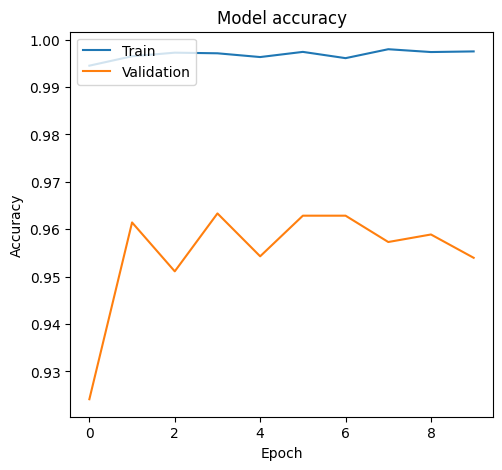

In [53]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()